## Reading data
We fetch the data from RDS and read the data now.We will use Python packages: pandas, matplotlib and scikit-learn. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [23]:
df = pd.read_csv('availability.csv')
df.head()

number  available_bikes  available_bike_stands  last_update status
0       1               12                     19   1678218770   OPEN
1       1               12                     19   1678219502   OPEN
2       1               12                     19   1678220107   OPEN
3       1               12                     19   1678220712   OPEN
4       1               12                     19   1678221317   OPEN

In [3]:
# Print the feature types in our dataset.
df.dtypes

number                    int64
available_bikes           int64
available_bike_stands     int64
last_update               int64
status                   object
dtype: object

In [26]:
df = pd.read_csv('weather.csv')
df.head()

station  last_update  temperature  weathercode  windspeed
0        1   1678215600          4.1            0        8.0
1        1   1678219200          3.7            2        6.3
2        1   1678222800          1.5            3        9.3
3        1   1678226400          1.8            3        7.6
4        1   1678230000          3.9            3       12.1

In [5]:
# Print the feature types in our dataset.
df.dtypes

station          int64
last_update      int64
temperature    float64
weathercode      int64
windspeed      float64
dtype: object

## Preparing the data
We prepare the data by cleaning it, transforming epoch time into datetime and calcutate the hourly value of features that can be used to train the prediction model.

In [11]:
#Print the number of duplicates of feature number and last_update
duplicated_count = df.duplicated(subset=['number', 'last_update']).sum()
print('Number of duplicate (excluding first) \'number\', \'last_update\' rows in the availibility.csv is: ', duplicated_count)

Number of duplicate (excluding first) 'number', 'last_update' rows in the availibility.csv is:  0


In [13]:
#Print the number of duplicates of feature number and last_update
duplicated_count = df.duplicated(subset=['station', 'last_update']).sum()
print('Number of duplicate (excluding first) \'station\', \'last_update\' rows in the weather.csv is: ', duplicated_count)

Number of duplicate (excluding first) 'station', 'last_update' rows in the weather.csv is:  0


In [17]:
# check for null values
df.isnull().sum()

number                   0
available_bikes          0
available_bike_stands    0
last_update              0
status                   0
dtype: int64

In [15]:
# check for null values
df.isnull().sum()

station        0
last_update    0
temperature    0
weathercode    0
windspeed      0
dtype: int64

In [25]:
# Descriptive stats for continuous features
df.describe().T 

count          mean            std           min  \
number                 499239.0  5.815697e+01      33.996110  1.000000e+00   
available_bikes        499239.0  1.189527e+01       9.481523  0.000000e+00   
available_bike_stands  499239.0  1.970245e+01      10.861629  0.000000e+00   
last_update            499239.0  1.679398e+09  679823.349601  1.675786e+09   

                                25%           50%           75%           max  
number                 2.900000e+01  5.800000e+01  8.800000e+01  5.070000e+02  
available_bikes        4.000000e+00  1.000000e+01  1.800000e+01  4.000000e+01  
available_bike_stands  1.100000e+01  2.000000e+01  2.800000e+01  4.000000e+01  
last_update            1.678812e+09  1.679402e+09  1.679985e+09  1.680664e+09

In [24]:
# Display the cardinality of each continuous feature

features_cardinality = list(df.columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

number                               115
available_bikes                      41
available_bike_stands                41
last_update                          400524
status                               1


In [27]:
# Descriptive stats for continuous features
df.describe().T 

count          mean            std           min           25%  \
station      73371.0  5.924604e+01      36.762825  1.000000e+00  2.900000e+01   
last_update  73371.0  1.679391e+09  682549.382346  1.678216e+09  1.678802e+09   
temperature  73371.0  9.108449e+00       3.374756 -3.000000e-01  7.200000e+00   
weathercode  73371.0  1.961530e+01      24.699965  0.000000e+00  2.000000e+00   
windspeed    73371.0  1.621180e+01       7.410924  0.000000e+00  1.090000e+01   

                      50%           75%           max  
station      5.900000e+01  8.900000e+01  5.070000e+02  
last_update  1.679389e+09  1.679980e+09  1.680660e+09  
temperature  9.700000e+00  1.170000e+01  1.630000e+01  
weathercode  3.000000e+00  5.100000e+01  7.500000e+01  
windspeed    1.560000e+01  2.100000e+01  4.360000e+01

In [22]:
# Display the cardinality of each continuous feature

features_cardinality = list(df.columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

station                              115
last_update                          646
temperature                          165
weathercode                          12
windspeed                            404


In [17]:
# converting the timestamp of availability.csv to human-readable datetime
try:
    df['last_update'] = pd.to_datetime(df['last_update'], unit='s')
except KeyError:
    print("The 'last_update' column is not present in the dataframe.")

# continue with the rest of the code
df.head()

number  available_bikes  available_bike_stands         last_update status
0       1               12                     19 2023-03-07 19:52:50   OPEN
1       1               12                     19 2023-03-07 20:05:02   OPEN
2       1               12                     19 2023-03-07 20:15:07   OPEN
3       1               12                     19 2023-03-07 20:25:12   OPEN
4       1               12                     19 2023-03-07 20:35:17   OPEN

In [20]:
# converting the timestamp of weather.csv to human-readable datetime
try:
    df['last_update'] = pd.to_datetime(df['last_update'], unit='s')
except KeyError:
    print("The 'last_update' column is not present in the dataframe.")

# continue with the rest of the code
df.head()

station         last_update  temperature  weathercode  windspeed
0        1 2023-03-07 19:00:00          4.1            0        8.0
1        1 2023-03-07 20:00:00          3.7            2        6.3
2        1 2023-03-07 21:00:00          1.5            3        9.3
3        1 2023-03-07 22:00:00          1.8            3        7.6
4        1 2023-03-07 23:00:00          3.9            3       12.1

In [18]:
# Calculate the every hour value of the features
if 'last_update' in df.columns:
    df.set_index('last_update', inplace=True)
    avg_hr = df.groupby('number')[['available_bikes', 'available_bike_stands']].resample('1h').mean()
    print(avg_hr)
    avg_hr.to_csv('avg_hr_availability.csv')
else:
    print("The 'last_update' column is not present in the dataframe.")

                            available_bikes  available_bike_stands
number last_update                                                
1      2023-03-07 19:00:00        12.000000              19.000000
       2023-03-07 20:00:00        12.000000              19.000000
       2023-03-07 21:00:00        13.571429              17.428571
       2023-03-07 22:00:00        14.333333              16.666667
       2023-03-07 23:00:00        10.571429              20.428571
...                                     ...                    ...
117    2023-04-04 23:00:00         0.000000              40.000000
       2023-04-05 00:00:00         0.000000              40.000000
       2023-04-05 01:00:00         0.000000              40.000000
       2023-04-05 02:00:00         0.000000              40.000000
507    2023-02-07 16:00:00         1.000000               0.000000

[77588 rows x 2 columns]


In [21]:
# Calculate the every hour value of the features
if 'last_update' in df.columns:
    df.set_index('last_update', inplace=True)
    avg_hr = df.groupby('station')[['temperature', 'weathercode', 'windspeed']].resample('1h').mean()
    print(avg_hr)
    avg_hr.to_csv('avg_hr_weather.csv')
else:
    print("The 'last_update' column is not present in the dataframe.")

                             temperature  weathercode  windspeed
station last_update                                             
1       2023-03-07 19:00:00          4.1          0.0        8.0
        2023-03-07 20:00:00          3.7          2.0        6.3
        2023-03-07 21:00:00          1.5          3.0        9.3
        2023-03-07 22:00:00          1.8          3.0        7.6
        2023-03-07 23:00:00          3.9          3.0       12.1
...                                  ...          ...        ...
507     2023-03-10 12:00:00          5.0          3.0       10.8
        2023-03-10 13:00:00          5.6          3.0        8.8
        2023-03-10 14:00:00          6.1          3.0        7.8
        2023-03-10 15:00:00          6.4          3.0        6.3
        2023-03-10 16:00:00          6.3          2.0        3.4

[77590 rows x 3 columns]


In [5]:
# Read the CSV files
df1 = pd.read_csv('avg_hr_availability.csv')
df2 = pd.read_csv('avg_hr_weather.csv')

# Merge the two dataframes on the 'station_id' column
merged_df = pd.merge(df1, df2, on='number')

# Write the merged dataframe to a new CSV file
merged_df.to_csv('merged.csv', index=False) 

In [28]:
data = pd.read_csv('merge_avg.csv')

In [58]:
data.head()

number  available_bikes  available_bike_stands  temperature  weathercode  \
0       1        12.000000              19.000000          4.1            0   
1       1        12.000000              19.000000          3.7            2   
2       1        13.571429              17.428571          1.5            3   
3       1        14.333333              16.666667          1.8            3   
4       1        10.571429              20.428571          3.9            3   

   windspeed  hr  day_of_week  is_holiday  
0        8.0  19            2           0  
1        6.3  20            2           0  
2        9.3  21            2           0  
3        7.6  22            2           0  
4       12.1  23            2           0

In [59]:
data.shape

(72922, 9)

In [60]:
# Look at correlations for all the continuous features.
data.groupby('number')[['available_bikes', 'hr', 'day_of_week', 'is_holiday', 'temperature', 'weathercode', 'windspeed']].corr()

available_bikes        hr  day_of_week  is_holiday  \
number                                                                       
1      available_bikes         1.000000  0.096703     0.333053    0.171945   
       hr                      0.096703  1.000000     0.013876    0.001061   
       day_of_week             0.333053  0.013876     1.000000    0.088729   
       is_holiday              0.171945  0.001061     0.088729    1.000000   
       temperature             0.168089  0.189403    -0.044421    0.118919   
...                                 ...       ...          ...         ...   
117    day_of_week            -0.384078  0.016600     1.000000    0.087446   
       is_holiday             -0.147110  0.014356     0.087446    1.000000   
       temperature             0.226128  0.180066    -0.047928    0.105870   
       weathercode            -0.220457  0.006486     0.025352   -0.029578   
       windspeed               0.269798  0.033015    -0.119148   -0.110660   

                        temperature  weathercode  windspeed  
number                                                       
1      available_bikes     0.168089    -0.057357  -0.157619  
       hr                  0.189403     0.020471   0.032241  
       day_of_week        -0.044421     0.023043  -0.134248  
       is_holiday          0.118919    -0.041034  -0.160447  
       temperature         1.000000    -0.038545   0.115844  
...                             ...          ...        ...  
117    day_of_week        -0.047928     0.025352  -0.119148  
       is_holiday          0.105870    -0.029578  -0.110660  
       temperature         1.000000    -0.074701   0.086315  
       weathercode        -0.074701     1.000000   0.093559  
       windspeed           0.086315     0.093559   1.000000  

[798 rows x 7 columns]

C:\Users\Aria\AppData\Local\Temp\ipykernel_20920\3940522887.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr1, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'available_bikes'),
  Text(1.5, 0, 'hr'),
  Text(2.5, 0, 'day_of_week'),
  Text(3.5, 0, 'is_holiday'),
  Text(4.5, 0, 'temperature'),
  Text(5.5, 0, 'weathercode'),
  Text(6.5, 0, 'windspeed')])

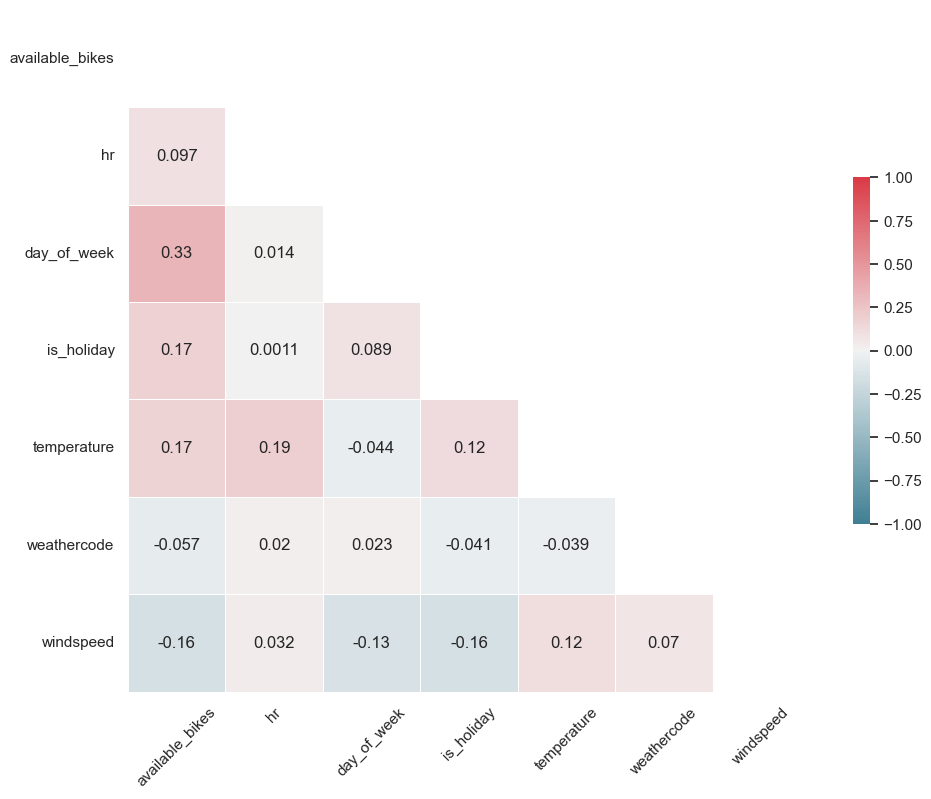

In [32]:
import seaborn as sns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Look at correlations for all the continuous features.
corr1 = data.loc[data['number'] == 1, ['available_bikes', 'hr', 'day_of_week', 'is_holiday', 'temperature', 'weathercode', 'windspeed']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [61]:
X = data[['hr', 'day_of_week', 'is_holiday', 'temperature', 'weathercode', 'windspeed']]
X.head()

hr  day_of_week  is_holiday  temperature  weathercode  windspeed
0  19            2           0          4.1            0        8.0
1  20            2           0          3.7            2        6.3
2  21            2           0          1.5            3        9.3
3  22            2           0          1.8            3        7.6
4  23            2           0          3.9            3       12.1

In [62]:
y = data[['available_bikes']]
y.head()

available_bikes
0        12.000000
1        12.000000
2        13.571429
3        14.333333
4        10.571429

## Train and Evaluate the modle - Linear Model
We split the data into training and testing datasets. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance. And choose linear prediction model and train the model using the training dataset.We use MSE and RMSE to evaluate the performance of the model using the testing dataset. 

In [63]:
# making prediction using linear model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib
import pickle

In [65]:
# Split the data into groups based on station_id
groups = data.groupby('number')

# Train a model for each group
models = {}
for number, group in groups:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        group[['hr', 'day_of_week', 'is_holiday', 'temperature', 'weathercode', 'windspeed']], group['available_bikes'], test_size=0.2)

    # Train a linear regression model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print("station_id : ",number)
    cept=model.intercept_
    a=model.coef_[0]
    b=model.coef_[1]
    c=model.coef_[2]
    d=model.coef_[3]
    e=model.coef_[4]
    f=model.coef_[5]
    print(f"available_bikes = {cept}+{a}*hr+{b}*day_of_week+{c}*is_holiday+{d}*temperature+{e}*weathercode+{f}*windspeed")
    
    y_pred = model.predict(X_test)
    print("MSE:",metrics.mean_squared_error(y_test, y_pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))    
    print("R2: ", metrics.r2_score(y_test, y_pred))
        
    # Save the model to pickle
    filename = f'models/{number}.pkl'
    with open(filename,'wb') as handle:
        pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)


station_id :  1
available_bikes = 3.771313394731468+0.037870275272436124*hr+1.3623364453787536*day_of_week+5.366410837824711*is_holiday+0.46981969451996886*temperature+-0.012438996873159192*weathercode+-0.13336115867453824*windspeed
MSE: 76.39580798534155
RMSE: 8.7404695517656
R2:  0.17189718784792973
station_id :  2
available_bikes = 5.8016947565448636+-0.07672740218700162*hr+0.06689338662358961*day_of_week+-1.1103926609548165*is_holiday+0.024760705789801295*temperature+0.0*weathercode+0.02476070578980131*windspeed
MSE: 16.790812695958117
RMSE: 4.097659416783942
R2:  0.04950378674500222
station_id :  3
available_bikes = 9.303952032144569+-0.026219948707803514*hr+0.2938892032446405*day_of_week+2.3126296544084397*is_holiday+-0.03206102190304405*temperature+0.0*weathercode+0.032061021903044065*windspeed
MSE: 24.77670263167787
RMSE: 4.9776201775223745
R2:  0.03333447664227274
station_id :  4
available_bikes = 8.6317965403284+0.001603227571283889*hr+0.6722007314978597*day_of_week+6.9657901

station_id :  61
available_bikes = 4.698421883375726+-0.06562831549574336*hr+-0.018270334205789267*day_of_week+-0.992838743828394*is_holiday+-0.15923017039852894*temperature+0.019044299520974996*weathercode+0.06974381924922264*windspeed
MSE: 11.585863369192642
RMSE: 3.40380131165035
R2:  -0.09410724981324181
station_id :  62
available_bikes = 7.3710806668010385+0.03578876674317514*hr+0.1933046178923639*day_of_week+-4.175368919799985*is_holiday+-0.5170561366923176*temperature+0.048272359635866874*weathercode+0.24864231979365495*windspeed
MSE: 43.27839537402373
RMSE: 6.578631725064395
R2:  0.15151369109124668
station_id :  63
available_bikes = 8.660119581728555+0.14296530898028253*hr+0.01204836458500555*day_of_week+4.622704051878709*is_holiday+0.38576455617746*temperature+0.01978595599829447*weathercode+-0.06572579027298384*windspeed
MSE: 32.93760400773682
RMSE: 5.739129202913698
R2:  -0.05590052500716314
station_id :  64
available_bikes = 12.989772910762422+-0.11236815475207886*hr+0.197

station_id :  92
available_bikes = 25.26137293989192+-0.2043811231273348*hr+1.9523205309421439*day_of_week+3.975918332318477*is_holiday+-0.08269133087270135*temperature+0.0*weathercode+-0.04134566543635065*windspeed
MSE: 167.44447580150572
RMSE: 12.94003384081764
R2:  0.09906073274510008
station_id :  93
available_bikes = 18.53265993113231+-0.02437460506548619*hr+2.733297234859382*day_of_week+8.917492706997471*is_holiday+-0.40159128686866746*temperature+0.0*weathercode+-0.2007956434343337*windspeed
MSE: 130.8341025201696
RMSE: 11.438273581278322
R2:  0.19561489645011976
station_id :  94
available_bikes = 11.203720943429827+-0.029952315145670826*hr+1.295091243400297*day_of_week+7.462086305530392*is_holiday+-0.47647349991991583*temperature+0.0*weathercode+-0.23823674995995794*windspeed
MSE: 42.24664307851044
RMSE: 6.499741770140599
R2:  0.009285724496557846
station_id :  95
available_bikes = 23.870355546813627+-0.16130722418836962*hr+-0.6849015838992505*day_of_week+2.6865203838215965*is_

In [66]:
# Split the data into groups based on station_id
groups = data.groupby('number')

# Train a model for each group
models = {}
for number, group in groups:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        group[['hr', 'day_of_week', 'is_holiday', 'temperature', 'weathercode', 'windspeed']], group['available_bike_stands'], test_size=0.2)

    # Train a linear regression model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print("station_id : ",number)
    cept=model.intercept_
    a=model.coef_[0]
    b=model.coef_[1]
    c=model.coef_[2]
    d=model.coef_[3]
    e=model.coef_[4]
    f=model.coef_[5]
    print(f"available_bike_stands = {cept}+{a}*hr+{b}*day_of_week+{c}*is_holiday+{d}*temperature+{e}*weathercode+{f}*windspeed")
    
    y_pred = model.predict(X_test)
    print("MSE:",metrics.mean_squared_error(y_test, y_pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2: ", metrics.r2_score(y_test, y_pred))
        
    # Save the model to pickle
    filename = f'models_bikestands/{number}.pkl'
    with open(filename,'wb') as handle:
        pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)
    

station_id :  1
available_bike_stands = 29.425661756919617+-0.10233269966712498*hr+-1.5278598906297693*day_of_week+-4.693540133402596*is_holiday+-0.5056886098840209*temperature+0.016972216749958968*weathercode+0.10632186393563112*windspeed
MSE: 68.66413371845015
RMSE: 8.28638242651461
R2:  0.12109394918391891
station_id :  2
available_bike_stands = 13.02335341293017+0.09759611623579112*hr+-0.03685672669632119*day_of_week+-0.18853296640098874*is_holiday+0.007831595785757052*temperature+0.0*weathercode+0.00783159578575705*windspeed
MSE: 15.232990810520539
RMSE: 3.9029464268063605
R2:  0.02355396342890015
station_id :  3
available_bike_stands = 10.515673381884543+0.02610420250237851*hr+-0.34212805952325887*day_of_week+-3.412476768062733*is_holiday+-0.11582251508087657*temperature+0.0*weathercode+0.11582251508087657*windspeed
MSE: 28.306045836145124
RMSE: 5.320342642738823
R2:  -0.09023676162748595
station_id :  4
available_bike_stands = 17.939292685816305+0.030290963077540714*hr+-0.630869

station_id :  57
available_bike_stands = 10.553058107845352+0.03972856312370951*hr+0.8683415540764812*day_of_week+3.9218408916899805*is_holiday+0.054046731628659805*temperature+-0.02185981383789981*weathercode+0.019820974408036426*windspeed
MSE: 23.468837196933222
RMSE: 4.844464593423428
R2:  0.13455879439996
station_id :  58
available_bike_stands = 25.327774567803413+-0.07315606871488241*hr+1.3047618104188166*day_of_week+-0.8962495325205705*is_holiday+-0.3409338079971176*temperature+0.025659722845665756*weathercode+-0.19545192683171952*windspeed
MSE: 104.56755907940493
RMSE: 10.225828038814505
R2:  0.031655266492073286
station_id :  59
available_bike_stands = 15.1307386472553+0.06230330753414363*hr+-0.15444859959310928*day_of_week+2.408167845759805*is_holiday+0.1370101597598749*temperature+-0.008669330831006631*weathercode+-0.08379123794020954*windspeed
MSE: 23.059052596370506
RMSE: 4.801984235331318
R2:  -0.019734068302187602
station_id :  60
available_bike_stands = 6.567558449962032

station_id :  88
available_bike_stands = 14.610573537565244+0.05979592547015784*hr+0.04825383440052515*day_of_week+-9.27302245177038*is_holiday+0.1375648339646691*temperature+-0.008754515791316038*weathercode+0.10691499771235992*windspeed
MSE: 61.173563893117546
RMSE: 7.821353073037781
R2:  0.06939276656756899
station_id :  89
available_bike_stands = 35.83476950886347+-0.007648755715881774*hr+-0.03290406608007102*day_of_week+3.6567463427571565*is_holiday+0.010501055864074004*temperature+0.004438541447965738*weathercode+0.004615661392481766*windspeed
MSE: 9.142407048056679
RMSE: 3.0236413557260193
R2:  0.005437468897199205
station_id :  90
available_bike_stands = 19.072190261039015+0.002501894588830118*hr+1.838928764010381*day_of_week+4.787012529825369*is_holiday+0.30239327338863975*temperature+0.0*weathercode+0.15119663669431982*windspeed
MSE: 151.5948929373914
RMSE: 12.312387783748179
R2:  0.03853189899409115
station_id :  91
available_bike_stands = 10.10010786097972+0.108119397444770

station_id :  117
available_bike_stands = 31.180042360162815+-0.05930152373104449*hr+1.8009865731580055*day_of_week+6.327708228843473*is_holiday+-0.4644185041020408*temperature+0.08751859585355393*weathercode+-0.311242640746697*windspeed
MSE: 62.57592240155507
RMSE: 7.9104944473499925
R2:  0.237031303925076


In [67]:
with open('model.pkl','wb') as handle:
    pickle.dump(model, handle, pickle.HIGHEST_PROTOCOL)

## Train and Evaluate the modle - RandomForestRegressor Model
We split the data into training and testing datasets. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance. And choose linear prediction model and train the model using the training dataset.We use MSE and RMSE to evaluate the performance of the model using the testing dataset. 

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [69]:
# Load data from CSV
data = pd.read_csv('merge_avg.csv')

In [71]:
# Define the features to use for prediction
features = ['hr', 'day_of_week', 'is_holiday', 'temperature', 'weathercode', 'windspeed']
# feature_names = [f"feature {i}" for i in range(X.shape[1])]

# Train and save a separate model for each station
for station_id in data['number'].unique():
    # Filter data for the current station
    station_data = data[data['number'] == station_id]
    
    # Split data into training and testing sets
    train_data = station_data[station_data['day_of_week'] > 3][features + ['available_bikes']]
    test_data = station_data[station_data['day_of_week'] < 4][features]
    
    # Train a random forest regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_data[features], train_data['available_bikes'])
    score=model.score(train_data[features], train_data['available_bikes'])
    importances=pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    
    # make predictions on the test set
    y_pred = model.predict(X_test)
    
    
    # compute the mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # compute the root mean squared error (RMSE)
    rmse = np.sqrt(mse)

    
    print("station_id : ",station_id)
    print(score)
    print(importances)
    print("MSE:",mse)
    print("RMSE:",rmse)    
    print("R2: ", metrics.r2_score(y_test, y_pred))

station_id :  1
0.9748429055965496
day_of_week    0.241906
hr             0.241055
temperature    0.226067
windspeed      0.168384
weathercode    0.065353
is_holiday     0.057234
dtype: float64
MSE: 574.9868620726656
RMSE: 23.978883670276765
R2:  -6.010635394243774
station_id :  2
0.32592335564283714
hr             0.672789
day_of_week    0.259044
is_holiday     0.068167
temperature    0.000000
weathercode    0.000000
windspeed      0.000000
dtype: float64
MSE: 736.2516476551014
RMSE: 27.133957463943613
R2:  -7.976886604878354
station_id :  3
0.3023398413544065
hr             0.570398
day_of_week    0.336283
is_holiday     0.093319
temperature    0.000000
weathercode    0.000000
windspeed      0.000000
dtype: float64
MSE: 543.7311281054325
RMSE: 23.318042973316448
R2:  -5.6295439828089515
station_id :  4
0.3197444235057173
hr             0.561097
day_of_week    0.305694
is_holiday     0.133209
temperature    0.000000
weathercode    0.000000
windspeed      0.000000
dtype: float64
MSE: 5

station_id :  32
0.9614952813726187
hr             0.261475
temperature    0.255061
day_of_week    0.208944
windspeed      0.139204
weathercode    0.130953
is_holiday     0.004362
dtype: float64
MSE: 426.36104096478385
RMSE: 20.648511834143978
R2:  -4.198487133670512
station_id :  33
0.9214557207862917
temperature    0.287200
windspeed      0.282428
hr             0.205392
weathercode    0.107525
day_of_week    0.094942
is_holiday     0.022513
dtype: float64
MSE: 396.8635781367747
RMSE: 19.921435142498513
R2:  -3.838833773597222
station_id :  34
0.9727672327005796
hr             0.395372
day_of_week    0.257878
windspeed      0.143350
temperature    0.091351
weathercode    0.068915
is_holiday     0.043134
dtype: float64
MSE: 397.80714362722154
RMSE: 19.94510324934974
R2:  -3.8503383731984524
station_id :  35
0.9563466819810764
day_of_week    0.255845
temperature    0.234626
windspeed      0.231827
hr             0.158287
weathercode    0.073383
is_holiday     0.046032
dtype: float64
MS

station_id :  64
0.9548275153875907
temperature    0.340286
weathercode    0.180415
windspeed      0.172133
hr             0.164042
day_of_week    0.095103
is_holiday     0.048020
dtype: float64
MSE: 350.5294112707066
RMSE: 18.72243069878232
R2:  -3.273895734799037
station_id :  65
0.9551954792809543
windspeed      0.232466
temperature    0.223048
day_of_week    0.198415
hr             0.193042
weathercode    0.110488
is_holiday     0.042540
dtype: float64
MSE: 663.675330730768
RMSE: 25.761896877574213
R2:  -7.091986218842607
station_id :  66
0.9569234125335306
hr             0.285583
windspeed      0.283621
temperature    0.199061
weathercode    0.112102
day_of_week    0.109870
is_holiday     0.009764
dtype: float64
MSE: 632.4937301660549
RMSE: 25.149428028606433
R2:  -6.711798692852625
station_id :  67
0.9599084418475715
windspeed      0.256509
temperature    0.193434
hr             0.185811
weathercode    0.173827
day_of_week    0.166912
is_holiday     0.023507
dtype: float64
MSE: 3

station_id :  97
0.4397820475659513
hr             0.494670
is_holiday     0.255239
day_of_week    0.250091
temperature    0.000000
weathercode    0.000000
windspeed      0.000000
dtype: float64
MSE: 250.29560112991058
RMSE: 15.820733267769562
R2:  -2.051776164031925
station_id :  98
0.3039371451025882
hr             0.580466
day_of_week    0.312837
is_holiday     0.106697
temperature    0.000000
weathercode    0.000000
windspeed      0.000000
dtype: float64
MSE: 308.4664161481671
RMSE: 17.563212011137573
R2:  -2.7610347603221785
station_id :  99
0.7463713859891574
hr             0.694973
day_of_week    0.279810
is_holiday     0.025218
temperature    0.000000
weathercode    0.000000
windspeed      0.000000
dtype: float64
MSE: 906.8623977452028
RMSE: 30.114156102159043
R2:  -10.057090244503401
station_id :  100
0.9815879789805468
hr             0.333259
day_of_week    0.328493
temperature    0.106727
windspeed      0.091762
weathercode    0.088783
is_holiday     0.050977
dtype: float64


## Conclusion
- We decided to choose linear model to predic the availibility because lower MSE,RMSE and high R^2 indicate that the linear model is performing better than the random forest regressor model. A lower RMSE for a linear model may indicate that the relationship between the features and the target variable is well-captured by a linear function, and a more complex model such as a random forest may be overfitting the data. It is also possible that the difference in RMSE between the two models is not statistically significant and could be due to chance.  The fact that the R-squared of the random forest regressor model is negative is not a good sign, as R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. This could happen if the model is overfitting or if the independent variables are not good predictors of the dependent variable. Ultimately, the choice of linear model depends on the this specific dublin bike availability problem.